# Data Exploration

This section will be exploring the different characteristics of the traffic <br>
data that was collected.

In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
pd.options.display.max_rows = 10

In [32]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

# global plotting options
# this is used to customize the plots
plt.rcParams.update(plt.rcParamsDefault)
matplotlib.style.use('ggplot')
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markeredgecolor'] = 'blue'
plt.rcParams['axes.facecolor'] = 'gainsboro'
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'
plt.rcParams['text.color'] = 'k'
plt.rcParams['figure.figsize'] = (10,2)
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['darkblue',
                                                    'dodgerblue',
                                                    'white',
                                                    'orange',
                                                    'red'])
plt.rcParams.update({'font.size': 8})


# Load Dataset

In [3]:
traffic_train = pd.read_csv('Traffic_Data/Traffic_Data_Train')
traffic_train

,Time,Postmile (Abs),Speed,Week,Flow,Occupancy,Truck Flow,Miles Traveled (Mean),Accidents,Temperature,...,HZ,OVC,RA,RA BR,SCT,TS,TSRA BR,VCSH,VCTS,VCTS +RA BR
0,0:00,53.02,69.17,1,1634,0.03,155,581738800,0.0,48.833333,...,0,0,0,0,1,0,0,0,0,0
1,0:00,53.75,67.55,1,1646,0.03,63,581738800,0.0,48.833333,...,0,0,0,0,1,0,0,0,0,0
2,0:00,54.06,67.82,1,1584,0.05,3,581738800,0.0,48.833333,...,0,0,0,0,1,0,0,0,0,0
3,0:00,54.55,71.10,1,1671,0.02,235,581738800,0.0,48.833333,...,0,0,0,0,1,0,0,0,0,0
4,0:00,54.87,65.68,1,1590,0.04,272,581738800,0.0,48.833333,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13723,23:00,55.31,66.10,52,3141,0.06,106,859085785,0.0,42.666667,...,0,0,0,0,0,0,0,0,0,0
13724,23:00,55.89,59.99,52,4140,0.10,1009,859085785,0.0,42.666667,...,0,0,0,0,0,0,0,0,0,0
13725,23:00,56.97,68.13,52,1843,0.03,28,859085785,0.0,42.666667,...,0,0,0,0,0,0,0,0,0,0
13726,23:00,57.80,70.31,52,2406,0.04,213,859085785,0.0,42.666667,...,0,0,0,0,0,0,0,0,0,0


# Features

In [4]:
traffic_train.columns

Index(['Time', 'Postmile (Abs)', 'Speed', 'Week', 'Flow', 'Occupancy',
       'Truck Flow', 'Miles Traveled (Mean)', 'Accidents', 'Temperature',
       'Windspeed', 'Precip', 'BKN', 'BR', 'BR VCSH', 'CLR', 'DU', 'FEW', 'FG',
       'HZ', 'OVC', 'RA', 'RA BR', 'SCT', 'TS', 'TSRA BR', 'VCSH', 'VCTS',
       'VCTS +RA BR'],
      dtype='object')

In [5]:
# convert Time to numeric to sort Time
traffic_train.Time = pd.to_numeric(traffic_train['Time']
                                   .str.split(':', expand=True)[0])

# Map

The Map Below shows both the accidents that occured in 2018 as well as the locations of the postmiles. The larger more concentrated areas are where more accidents have occured. The green pins are roughly the locations of the postmiles. Here we can see that most of the accidents seem to be occuring before the interchange between the San Bernardino Fwy and the Ontario Fwy.

<img src="traffic_map.png" style="height:400px">

Note: <br>
    There are some slight discrepencies between the postmile locations due to <br>
    the mapping that had to be done in the collection & cleaining phase

# Independent Analysis

In [6]:
# Convenient plotting method
def plot_feature_mean(df, by, feature, ylabel='', xticks=False):
    
    # compute average
    ax = df.groupby(by)[feature].mean().plot(kind='line', legend=True, rot=50)
    ax.set_ylabel(ylabel, rotation=90);
    
    # display all x-axis values
    if xticks:
        ax.set_xticks(df[by].unique());

# Speed

The plot below does not provide too much insights, but simply demonstrate the variability <br>
of speed throughout the entire year.

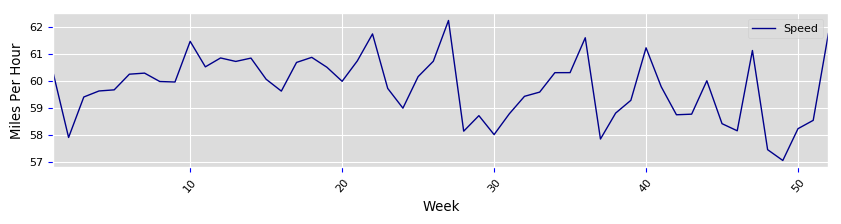

In [11]:
plot_feature_mean(traffic_train, 'Week', 'Speed', 'Miles Per Hour')

Here we can see that speed gradually decreases during the time between 13:00 and 17:00. <br>
These hours correspond to 1:00 PM through 5:00 PM. This is expected since these times <br>
are associated with the events such as leaving work or finishing school. Therefore, we can <br>
expect more traffic during these hours which might be the reason for the decrese in speed.

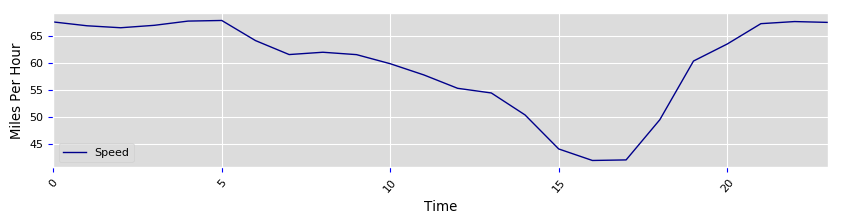

In [12]:
plot_feature_mean(traffic_train, 'Time', 'Speed', 'Miles Per Hour')

A similar trough can be seen in the plot below. There appears to be a dramatic decrease <br>
in speed from postmiles 54.55 to 54.89. In the map above these locations also appear <br>
to be where most of the accidents seem to be occurring, before the interchange between <br>
the two freeways.

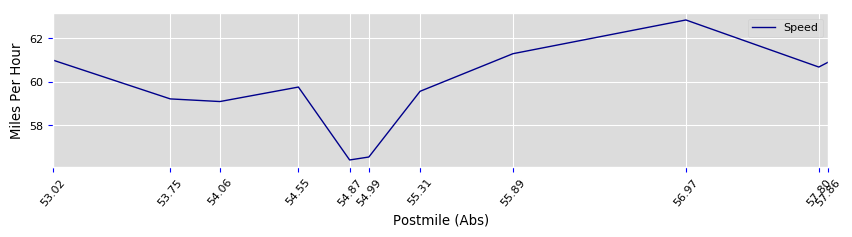

In [13]:
plot_feature_mean(traffic_train, 'Postmile (Abs)', 'Speed', 'Miles Per Hour', True)

# Flow

There doesn't appear to be any noticeable characteristics here other than the slight <br>
decline towards the last weeks.

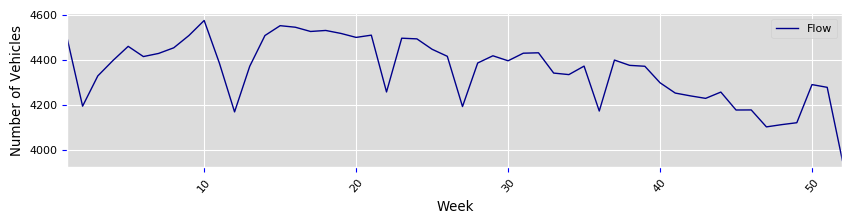

In [14]:
plot_feature_mean(traffic_train, 'Week', 'Flow', 'Number of Vehicles')

Here we can see that traffic is heavy during the afternoon, and dramatically <br>
lower during the midnight hours which is as we would expect. Traffic begins <br>
to increase during about 5:00 AM remains constant after about 8:00 AM which is <br>
usually when people start their day.

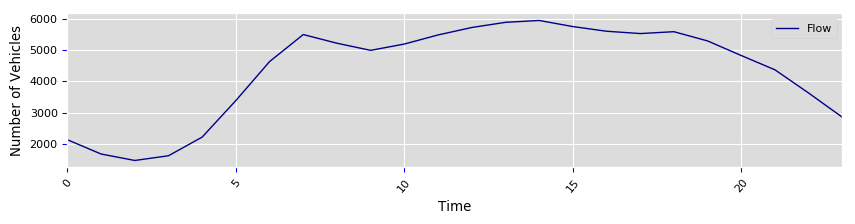

In [15]:
plot_feature_mean(traffic_train, 'Time', 'Flow', 'Number of Vehicles')

There appears to be a rather large traffic flow at postmile 55.89 which is most <br>
likely the location of the interchange. Traffic then declines rapidly after this <br>
postmile.

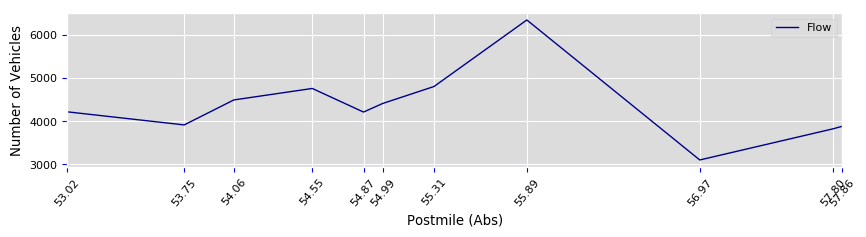

In [16]:
plot_feature_mean(traffic_train, 'Postmile (Abs)', 'Flow', 'Number of Vehicles', True)

# Occupancy

Similar to the other plot, there are not any noticeable characterisitcs here.

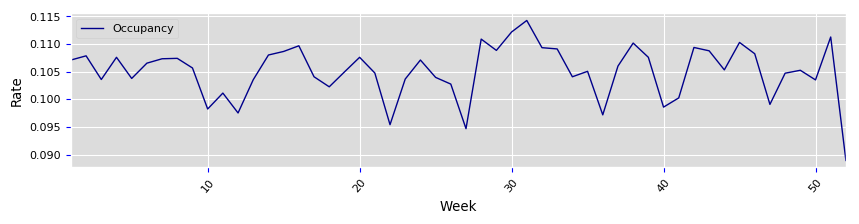

In [17]:
plot_feature_mean(traffic_train, 'Week', 'Occupancy', 'Rate')

Occupancy seems to be the largest between 15:00 (3:00 PM) and 17:00 (5:00 PM). <br>
These are also the times when speed seems to drop significantly. Furthermore, <br>
occupancy is lowest during the midnight which is as we would expect.

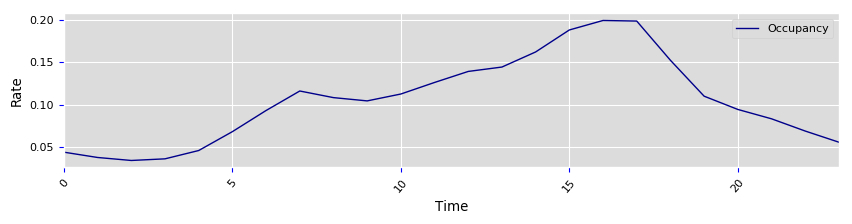

In [18]:
plot_feature_mean(traffic_train, 'Time', 'Occupancy', 'Rate')

Similar to traffic flow, occupancy seems to be highest at postmile 55.89. Occupancy <br>
then quickly decreases. Again, this is most likely due to the interchange. There is <br>
also a rather sharp increase from postmile 54.55 to 54.87, eventhough the postmiles <br>
are fairly close to each other. Postmile 54.55 might be an the entrance to the freeway. <br>

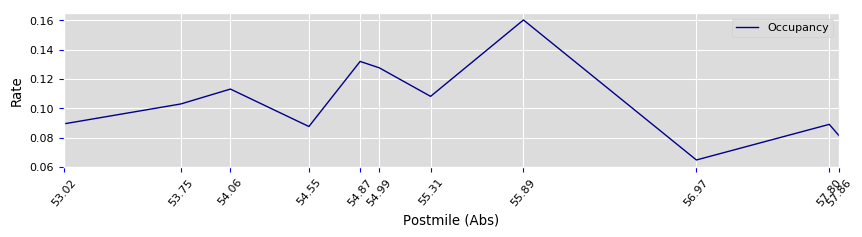

In [19]:
plot_feature_mean(traffic_train, 'Postmile (Abs)', 'Occupancy', 'Rate', True)

# Truck Flow

In the plot below there is a noticeable drop in truck flow during the 11th week. <br>
This week corresponds to the third week of March, and I'm not sure why there is <br>
such a sudden drop. Truck flow also appears to gradually decline over the course <br>
of the year.

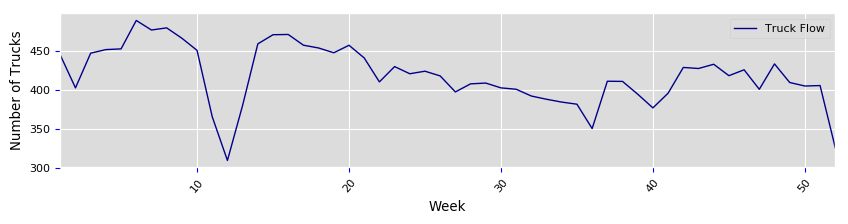

In [20]:
plot_feature_mean(traffic_train, 'Week', 'Truck Flow', 'Number of Trucks')

Truck flow seems to increase over time and then gradually decrease toward the <br>
end of the day. Truck flow seems to peak at about 13:00 (1:00 PM) and then is <br>
at its lowest during about 3:00 AM.

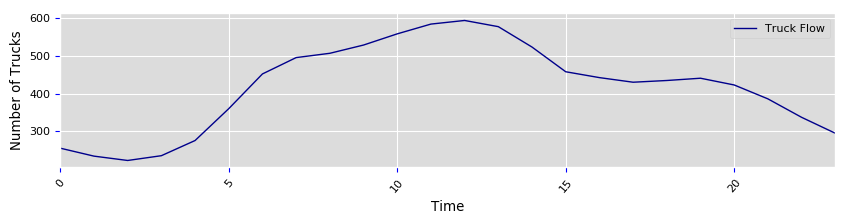

In [21]:
plot_feature_mean(traffic_train, 'Time', 'Truck Flow', 'Number of Trucks')

In the graph below there is a noteicable peak again at postmile 55.89. This postmile <br>
seems to be placed at the interchange, where most of the congestion appears to be <br>
created. This congestion is most likely related to the truck flow peak below.

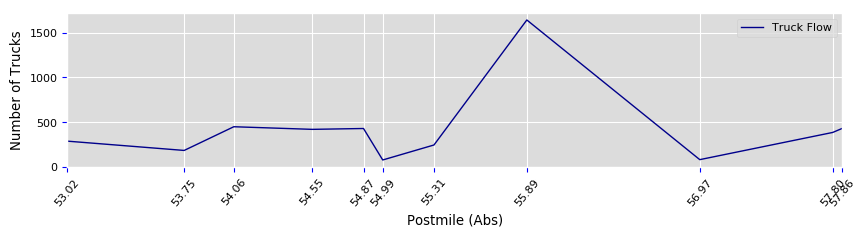

In [22]:
plot_feature_mean(traffic_train, 'Postmile (Abs)', 'Truck Flow', 'Number of Trucks', True)

# Miles Traveled (Mean)

There doesn't appear to be any characteristics other than the decline toward the <br>
end of the year. Holidays during the end of the year might be a reason for this <br>
decline.

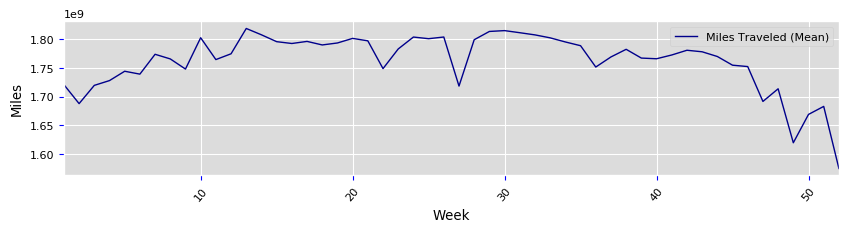

In [23]:
plot_feature_mean(traffic_train, 'Week', 'Miles Traveled (Mean)', 'Miles')

During the morining, miles traveled is low, and then gradually increases during 5:00 AM <br>
and remains fairly constant throughout the afternoon.

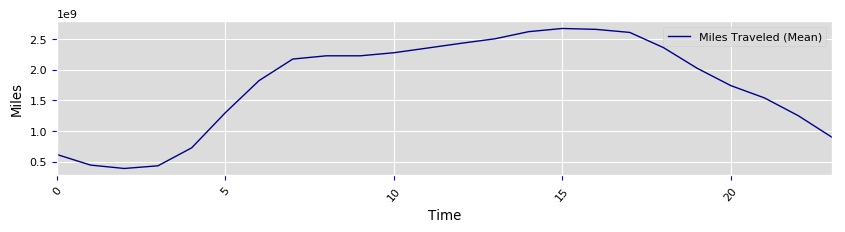

In [24]:
plot_feature_mean(traffic_train, 'Time', 'Miles Traveled (Mean)', 'Miles')

The graph below is a constant line since miles traveled is averaged throughout the <br>
entire stretch of the freeway.

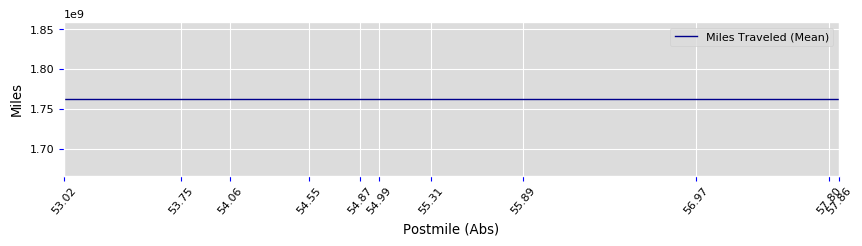

In [25]:
plot_feature_mean(traffic_train, 'Postmile (Abs)', 'Miles Traveled (Mean)', 'Miles', True)

# Relationships

Normalize the features to display them together on a single plot

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
traffic = traffic_train.drop(['Time', 'Week', 'Postmile (Abs)'], axis=1).astype(float)
traffic_SC = pd.DataFrame(sc.fit_transform(traffic))
traffic_SC.columns = traffic.columns
traffic_SC['Week'] = traffic_train['Week']
traffic_SC['Time'] = traffic_train['Time']
traffic_SC['Postmile (Abs)'] = traffic_train['Postmile (Abs)']

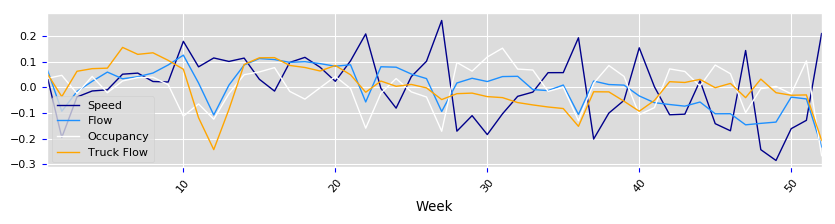

In [27]:
traffic_SC.groupby('Week').Speed.mean().plot(kind='line', legend=True, rot=50)
traffic_SC.groupby('Week').Flow.mean().plot(kind='line', legend=True, rot=50)
traffic_SC.groupby('Week').Occupancy.mean().plot(kind='line', legend=True, rot=50)
traffic_SC.groupby('Week')['Truck Flow'].mean().plot(kind='line', legend=True, rot=50)
plt.savefig('features.png', bbox_inches = 'tight')

The graph below shows some interesting relationships between the features. <br>
During the morning, there is low traffic and occupancy, but the speed is high. <br>
During the afternoon, there is high traffic and occupancy, but the speed is low. <br>
These characteristics are expected and show the negative correlation between <br>
traffic congestion and speed.

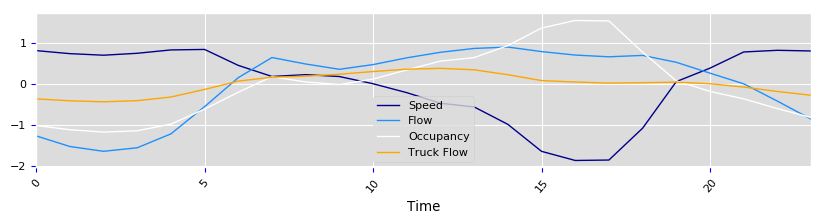

In [28]:
traffic_SC.groupby('Time').Speed.mean().plot(kind='line', legend=True, rot=50)
traffic_SC.groupby('Time').Flow.mean().plot(kind='line', legend=True, rot=50)
traffic_SC.groupby('Time').Occupancy.mean().plot(kind='line', legend=True, rot=50)
traffic_SC.groupby('Time')['Truck Flow'].mean().plot(kind='line', legend=True, rot=50)
plt.savefig('traffic_rel.png', bbox_inches = 'tight')

Here, we again see the significance of postmile 55.89~56, the location of the <br>
interchange. One intersting characteristic is the large increase in truck flow <br>
at this postmile, relative to the other features.

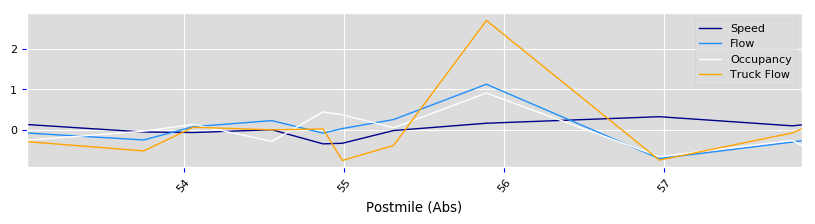

In [29]:
traffic_SC.groupby('Postmile (Abs)').Speed.mean().plot(kind='line', legend=True, rot=50)
traffic_SC.groupby('Postmile (Abs)').Flow.mean().plot(kind='line', legend=True, rot=50)
traffic_SC.groupby('Postmile (Abs)').Occupancy.mean().plot(kind='line', legend=True, rot=50)
traffic_SC.groupby('Postmile (Abs)')['Truck Flow'].mean().plot(kind='line', legend=True, rot=50)
plt.savefig('traffic_rel2.png', bbox_inches = 'tight')

The graph below shows the correlations between each of the features. There is <br>
a strong negative correlation between occupancy and speed, as well as a strong <br>
postive correlation between occupancy and flow. However, there doesn't appear to <br>
be such a strong correlation between speed and flow. There also appears to be a <br>
moderate postive correlation between truck flow and traffic flow.

In regards to the individual data, speed is left skewed and both occupancy and <br>
truck flow are right skewed. Flow appears to be slightly symmetric with a <br>
distringuishable right tail.

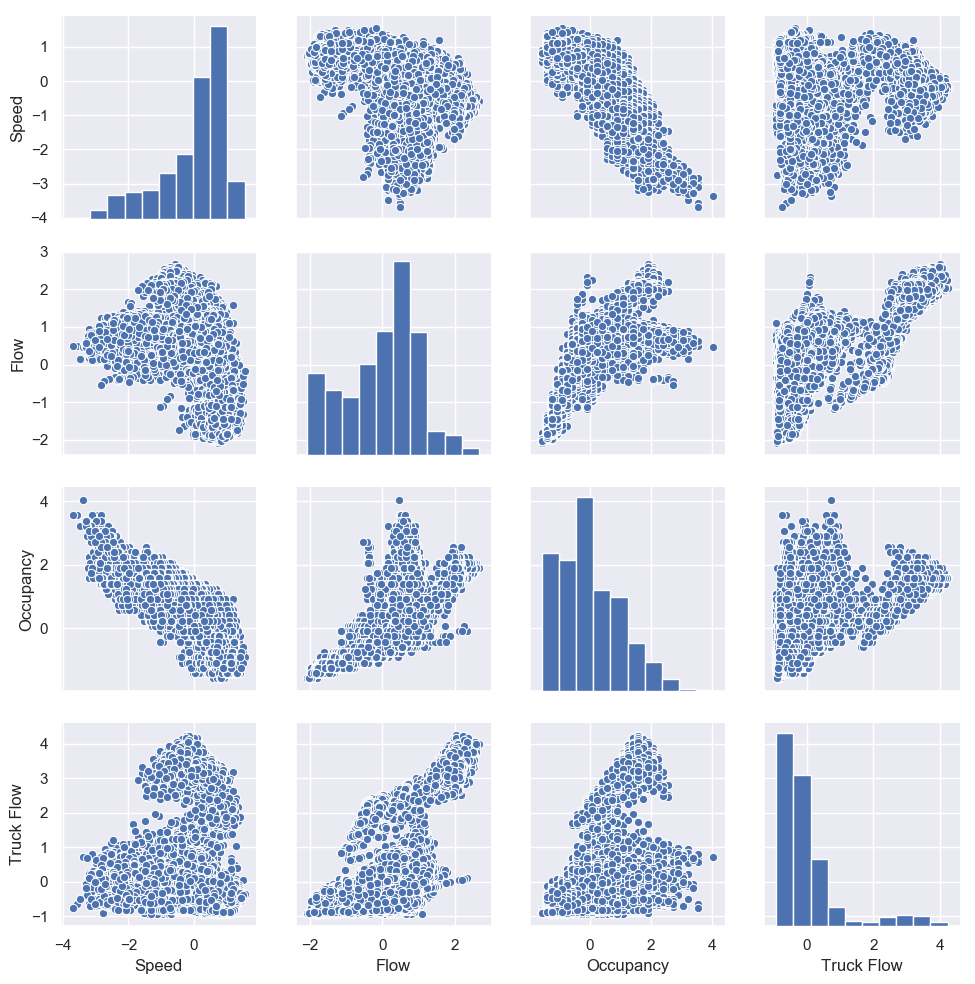

In [30]:
import seaborn as sns
sns.set()
cols = ['Speed', 'Flow', 'Occupancy', 'Truck Flow']
sns_plot = sns.pairplot(traffic_SC[cols], height = 2.5)
plt.show();
sns_plot.savefig('rels.png')

# Accidents

The graph below is multimodal and the amount of accidents appear to peak <br>
at different weeks.

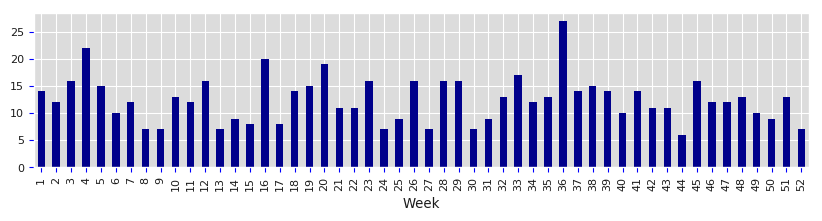

In [33]:
traffic_train.groupby('Week').Accidents.sum().plot.bar();

The graph below demonstrates how most accidents appear to be occuring during <br>
the afternoon between 14:00 (2:00) and 18:00 (6:00). This is logical since <br>
the analysis from the previous features suggest that traffic congestion increases <br>
during these times.

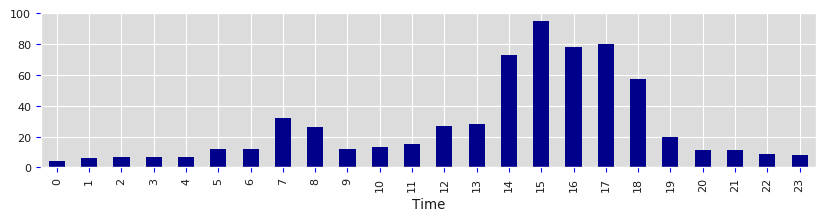

In [34]:
traffic_train.groupby('Time').Accidents.sum().plot.bar()
plt.savefig('accidents', bbox_inches = 'tight')

There were a toal of 650 reported accidents for the entire year. The graph below <br>
indicates that most of the traffic accidents appear to happend between postmiles <br>
55.31, 55.89, 56.97, and 57.8. These postmiles account for 337 of the total accidents. <br>
Since 55.89 is most likely the location of the interchange, this suggest that most <br>
accidents are occuring directly before, at, and directly after this interchange.

In [35]:
counts = (traffic_train.groupby('Postmile (Abs)')
          .Accidents
          .sum()[[55.31, 55.89, 56.97, 57.8]])
counts

Postmile (Abs)
55.31    142.0
55.89    122.0
56.97     73.0
57.80     73.0
Name: Accidents, dtype: float64

In [36]:
counts.sum()

410.0

In [37]:
traffic_train['Accidents'].sum()

650.0

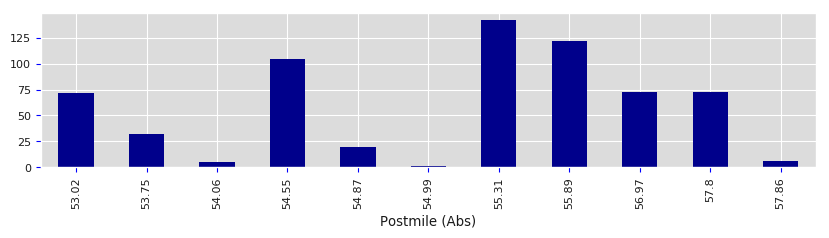

In [38]:
traffic_train.groupby('Postmile (Abs)').Accidents.sum().plot.bar()
plt.savefig('accidents_2.png', bbox_inches = 'tight')

The heatmap show the correlations between accidents and traffic features. <br>
Surprisingly, there are no distinct correlations. This is most likely due to <br>
the time distortion of the data, as the hours are weekly averages. The analysis <br>
in the Machine Learning section will go more into detail of how this impacted <br>
the results.

In [39]:
import seaborn as sns

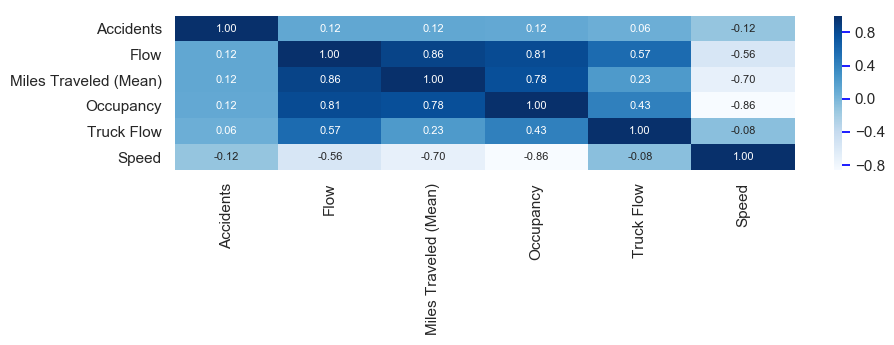

In [40]:
# correlation matrix
corrmat = traffic_SC.iloc[:,:6].corr()

# number of variables for heatmap
k = 8

# create heatmap
cols = corrmat.nlargest(k, 'Accidents')['Accidents'].index
cm = np.corrcoef(traffic_SC[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 8},
                 yticklabels=cols.values, xticklabels=cols.values, cmap='Blues')
plt.show()

# Weather

In [41]:
traffic_train.iloc[:, 9:]

,Temperature,Windspeed,Precip,BKN,BR,BR VCSH,CLR,DU,FEW,FG,HZ,OVC,RA,RA BR,SCT,TS,TSRA BR,VCSH,VCTS,VCTS +RA BR
0,48.833333,2.333333,0.0,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0
1,48.833333,2.333333,0.0,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0
2,48.833333,2.333333,0.0,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0
3,48.833333,2.333333,0.0,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0
4,48.833333,2.333333,0.0,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13723,42.666667,3.666667,0.0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
13724,42.666667,3.666667,0.0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
13725,42.666667,3.666667,0.0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
13726,42.666667,3.666667,0.0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0


These are some of the abbreviations and their meanings

BR = mist <br>
DU = widespread dust <br>
CLR = clear <br>
FG = fog <br>
HZ = haze <br>
OVC = overcast <br>
RA = rain <br>
SCT = scattered <br>
TSRA = thunderstorm with rain <br>
TS = thunderstorm <br>

In [42]:
# Analyze the data separately
weather_cols_1 = ['Temperature', 'Windspeed', 'CLR','RA', 'OVC', 'BR']
weather_cols_2 = ['FG', 'HZ', 'TSRA BR', 'DU', 'TS']
traffic_cols = traffic_SC.iloc[:,:6].columns.values

The heatmap below shows some of the correlations between weather and traffic. <br>
We can see that temperature and windspeed seem to be influential. Windspeed <br>
is negatively correlated with speed and postively correlated with flow, miles <br>
traveled, occupancy and temperature. Temperature is also negatively correlated <br>
with speed. I expected to see a postivie correlation since it appears that drivers <br>
are more cautious during colder temperatures due to events such as rain. Temperature <br>
is positively correlated with windspeed, flow, miles traveled, and occupancy. <br>
This is expected as less people tend to be out during colder temperatures as opposed <br>
to hotter temperatures. 

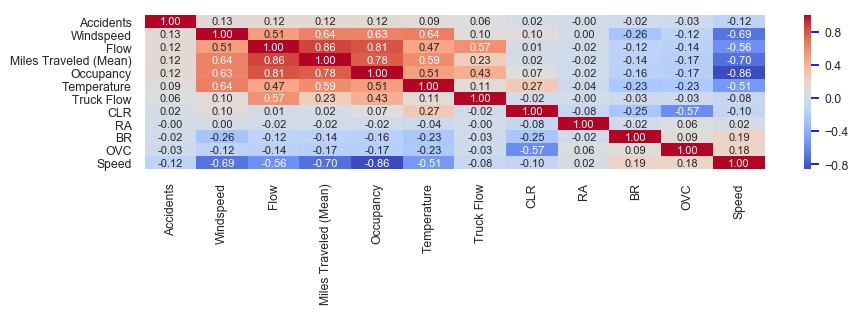

In [43]:
# correlation matrix
cols = np.append(traffic_cols, weather_cols_1)
corrmat = traffic_SC[cols].corr()

# number of variables for heatmap
k = cols.shape[0]

# create heatmap
cols = corrmat.nlargest(k, 'Accidents')['Accidents'].index
cm = np.corrcoef(traffic_SC[cols].values.T)
sns.set(font_scale=.8)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 8},
                 yticklabels=cols.values, xticklabels=cols.values, cmap='coolwarm')
plt.show()
fig = hm.get_figure()
fig.savefig('weather.png', bbox_inches = 'tight')

The weather features here do not appear to have any correlation with the <br>
traffic features. In general, only temperature and windspeed appear to <br>
be relevant weather features.

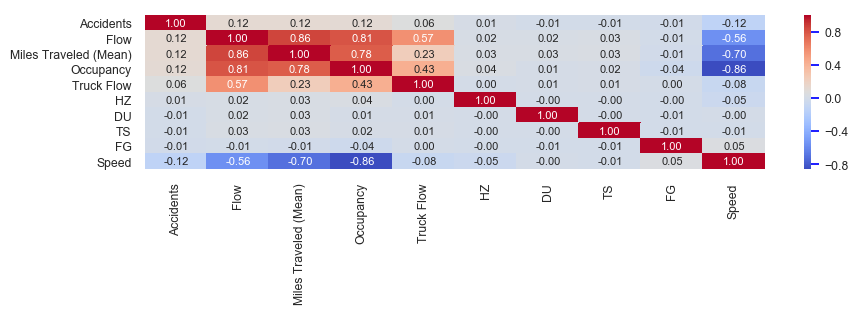

In [44]:
# correlation matrix
cols = np.append(traffic_cols, weather_cols_2)
corrmat = traffic_SC[cols].corr()

# number of variables for heatmap
k = cols.shape[0]

# create heatmap
cols = corrmat.nlargest(k, 'Accidents')['Accidents'].index
cm = np.corrcoef(traffic_SC[cols].values.T)
sns.set(font_scale=.8)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 8},
                 yticklabels=cols.values, xticklabels=cols.values, cmap='coolwarm')
plt.show()